# Importing All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Ingestion

In [2]:
df=pd.read_csv(r'C:\Users\PS4Z\Downloads\Admission_Predict.csv')

In [3]:
#seeing how the looks like
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Understanding Data

In [4]:
#seeing the shape of data
print('Data Shape:',df.shape)

Data Shape: (400, 9)


In [5]:
#understanding about null values in data
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
#Getting information about data; null counts and data types of data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
#list of column names
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
#getting rid of all spaces in the column names
df.columns=df.columns.str.strip()

In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [10]:
#getting data types of each column header
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [11]:
#Getting 5 point summary for all numercial features
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [12]:
#duplicate entries in data
df.duplicated().sum()

0

Observation:no duplicate entries

In [13]:
#null entries in data
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Observation:no null entries

In [14]:
feat_df=df.drop(['Serial No.','Research','Chance of Admit'],axis=1)
feat=feat_df.columns
feat

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], dtype='object')

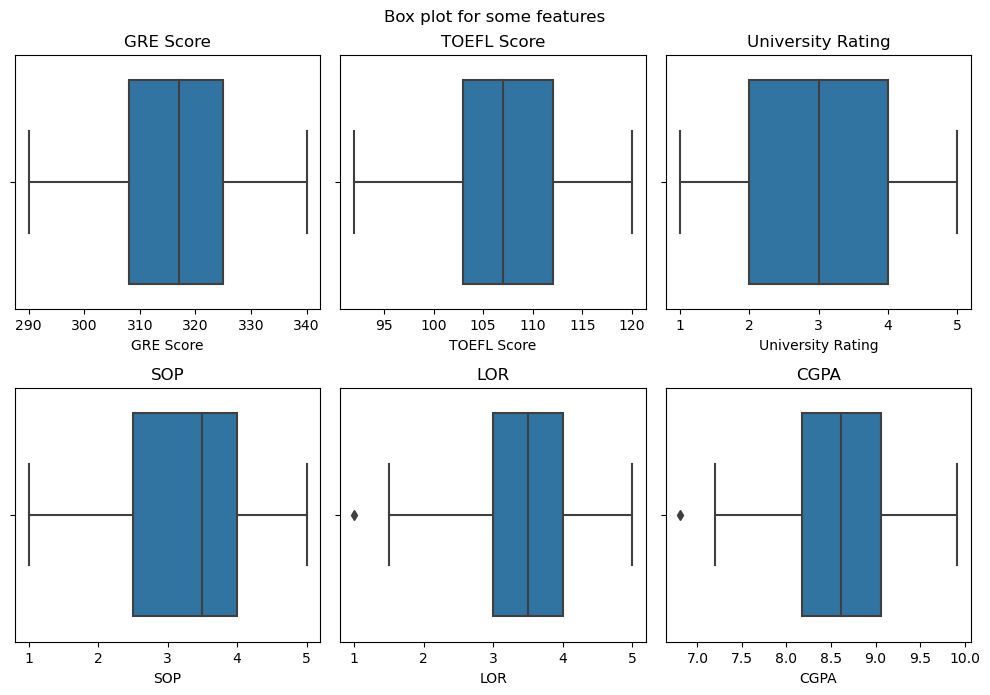

In [15]:
#checking outliers
plt.figure(figsize=(10,10))
plt.suptitle('Box plot for some features')
for a in range(0,len(feat)):
    plt.subplot(3,3,a+1)
    sns.boxplot(x=df[feat[a]],hue=df['Chance of Admit'],data=df,orient='h')
    plt.title(label=feat[a])
    plt.tight_layout();

Observations:very few outliers are present in dataset, this will not affect our model so we do not handle it

# Visualizing the Data 

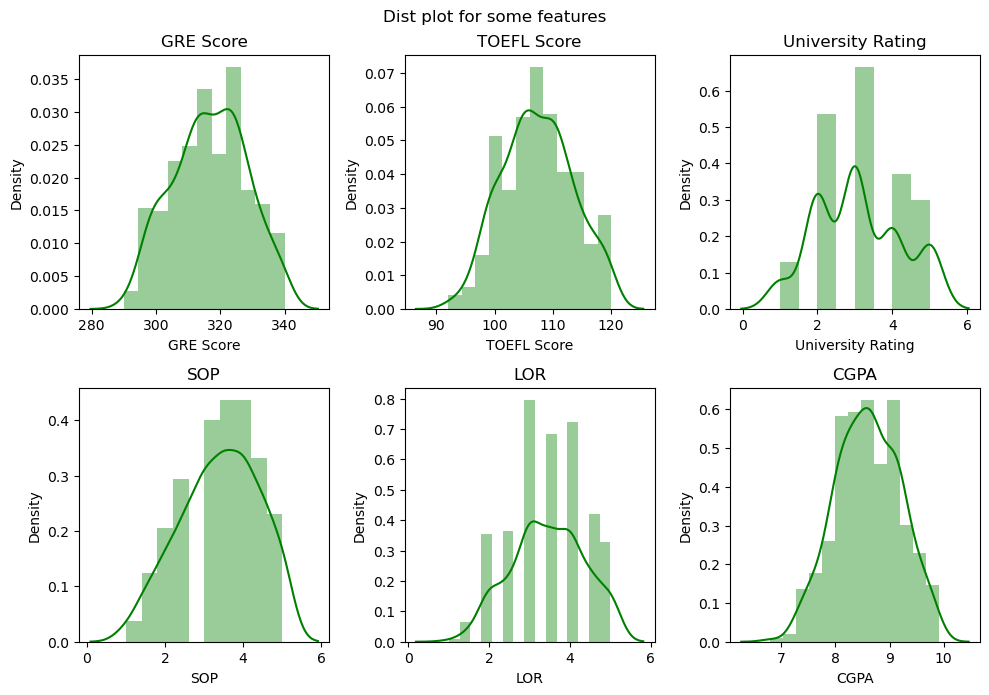

In [16]:
#checking distribution of all features
plt.figure(figsize=(10,10))
plt.suptitle('Dist plot for some features')
for a in range(0,len(feat)):
    plt.subplot(3,3,a+1)
    sns.distplot(df[feat[a]],color='Green')
    plt.title(label=feat[a])
    plt.tight_layout();

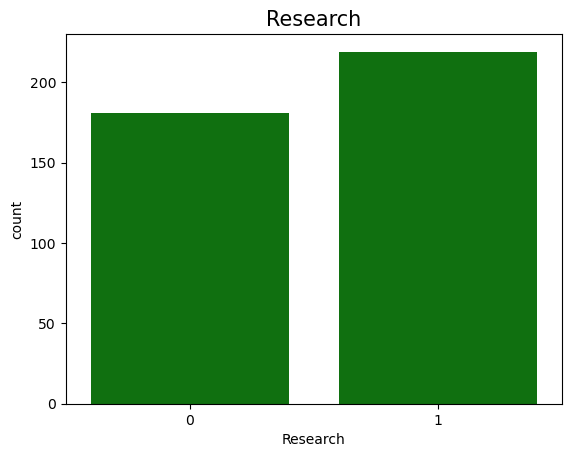

In [17]:
#since research is more of a categorical feature
plt.title('Research',fontsize=15)
sns.countplot(df['Research'],color='green');

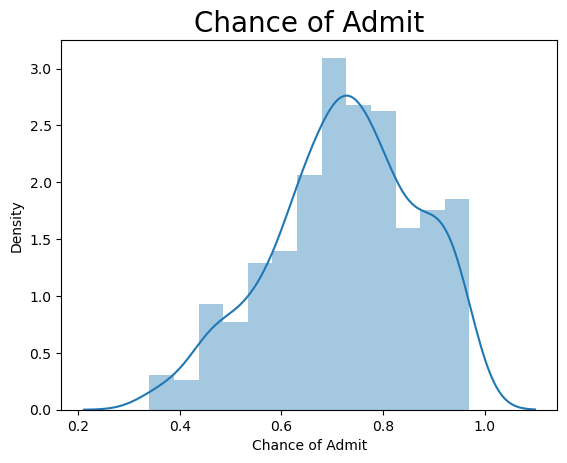

In [18]:
#distribution of our target variable
sns.distplot(df['Chance of Admit']).set_title('Chance of Admit',size='20')
plt.show();

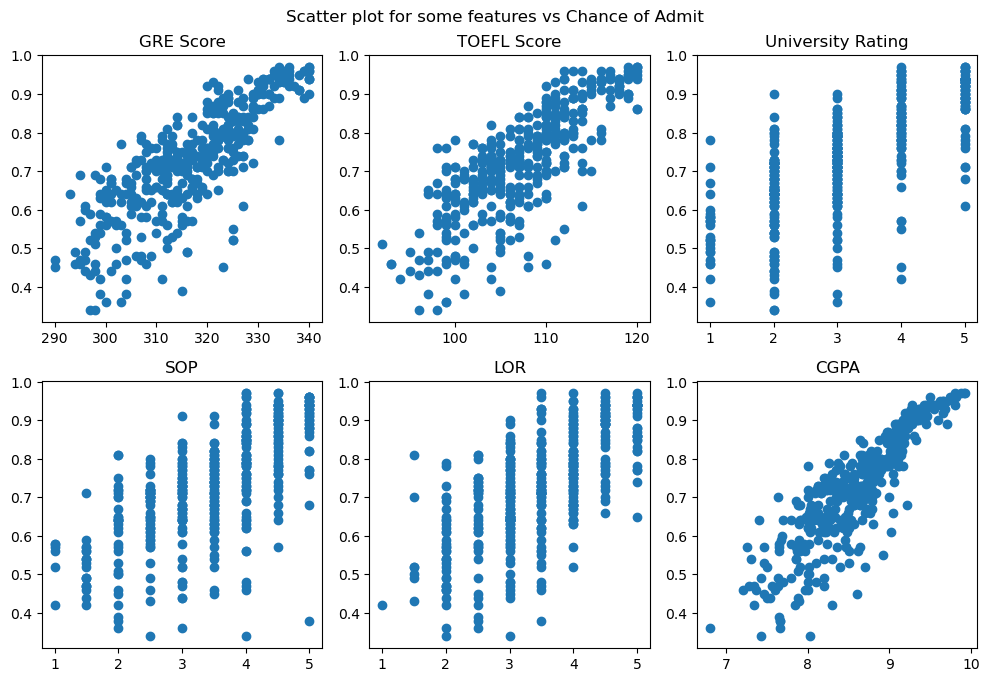

In [19]:
#scatter plot wrt Target Variable
plt.figure(figsize=(10,10))
plt.suptitle('Scatter plot for some features vs Chance of Admit')
for a in range(0,len(feat)):
    plt.subplot(3,3,a+1)
    plt.scatter(df[feat[a]],df['Chance of Admit'])
    plt.title(label=feat[a])
    plt.tight_layout();

Observations:GRE Score, TOEFL Score and CGPA follows a linear trend wrt Chance of Admit

In [20]:
#checking correlation between features
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


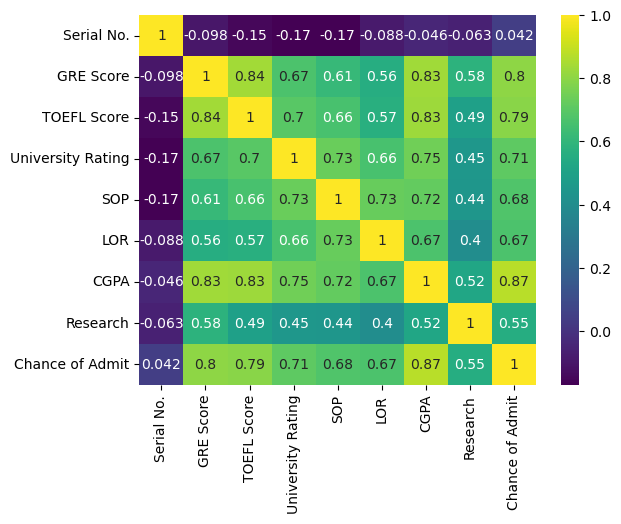

In [21]:
sns.heatmap(data=df.corr(),annot=True,cmap='viridis');

# Separating target variable(Dependent) from Indeendent variables

In [22]:
#dependent features
x=df.iloc[:,:-1]

#independent features
y=df.iloc[:,-1]

In [23]:
#checking our independent variable data
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [24]:
#checking oit dependent variable data
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

# Train Test Split

In [25]:
#random state train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [26]:
x_train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
237,238,329,114,5,4.5,5.0,9.19,1
268,269,327,113,4,4.5,5.0,9.14,0
186,187,317,107,3,3.5,3.0,8.68,1
106,107,329,111,4,4.5,4.5,9.18,1
41,42,316,105,2,2.5,2.5,8.20,1


In [27]:
#getting shape of training data
x_train.shape,y_train.shape

((280, 8), (280,))

In [28]:
#getting shape of testing data
x_test.shape,y_test.shape

((120, 8), (120,))

# Standardize the variables

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [30]:
#fit and transform
x_train= scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# SVR Model

In [31]:
#SVR Model
from sklearn.svm import SVR
regression=SVR(kernel='rbf')
regression.fit(x_train,y_train)

SVR()

In [32]:
#prediction
y_pred=regression.predict(x_test)

# Performance Metrics

In [33]:
#performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [34]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 0.004277982013238933
MAE: 0.04855271860059429


# R square and Adjusted R square

In [35]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('R-square:',score)

R-square: 0.7676426930486213


In [36]:
adjusted_r_2=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('adjusted_r_2:',adjusted_r_2)

adjusted_r_2: 0.7508962204755489


# Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [38]:
#hyperparameter tuning the svm model
param_grid={'kernel':['rbf','linear','poly']}
grid=GridSearchCV(estimator=SVR(),
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'linear', 'poly']})

In [39]:
#prediction
svr_pred=grid.predict(x_test)

#r2 score
svr_r2Score=metrics.r2_score(y_test,svr_pred)
print('SVR R2 score:',svr_r2Score)

SVR R2 score: 0.7721290956813317


In [40]:
#Adjusted r2 score
Adjusted_r2=1-(1-svr_r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('Adjusted_r2:',Adjusted_r2)

Adjusted_r2: 0.7557059674421485


In [41]:
print('After Hyper-parameter Tuning')
print('MSE:',mean_squared_error(y_test,svr_pred))
print('MAE:',mean_absolute_error(y_test,svr_pred))

After Hyper-parameter Tuning
MSE: 0.00419538185738974
MAE: 0.04732226181713412


# Before and After Hyperparameter

In [42]:
print(f"Before Hyper-parameter Tuning\n R-Square:{score}\n Adjusted R_2:{adjusted_r_2}\n")
print(f"After Hyper_parameter Tuning\n R-Square:{svr_r2Score} \n Adjusted R_2:{Adjusted_r2}\n")

Before Hyper-parameter Tuning
 R-Square:0.7676426930486213
 Adjusted R_2:0.7508962204755489

After Hyper_parameter Tuning
 R-Square:0.7721290956813317 
 Adjusted R_2:0.7557059674421485

